In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
import warnings
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
from collections import Counter
num_col = train.loc[:,'MSSubClass':'SaleCondition'].select_dtypes(exclude=['object']).columns
# Outlier detection 

def detect_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

Outliers_to_drop = detect_outliers(train,2, num_col)
train.loc[Outliers_to_drop] 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,127500
172,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239000
246,247,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,137000
291,292,190,RL,55.0,5687,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,135900
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
344,345,160,RM,36.0,2592,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,85000
504,505,160,RL,24.0,2308,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,147000


In [ ]:
# Drop outliers
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [ ]:
df = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

In [ ]:
df['GrLivArea'] = df['GrLivArea'].clip(0, 3500)
df['TotalBsmtSF'] = df['TotalBsmtSF'].clip(0, 3500)
df['1stFlrSF'] = df['1stFlrSF'].clip(0, 3500)
df['GarageArea'] = df['GarageArea'].clip(0, 1200)
df['YearBuilt'] = df['YearBuilt'].clip(1950, df['YearBuilt'].max())
df['YearRemodAdd'] = df['YearRemodAdd'].clip(1950, df['YearRemodAdd'].max())
df['BsmtFinSF1'] = df['BsmtFinSF1'].clip(0, 2500)
df['OpenPorchSF'] = df['OpenPorchSF'].clip(0, 400)
df['LotArea'] = df['LotArea'].clip(0, 70000)
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].clip(0, 11)
df['HalfBath'] = df['HalfBath'].clip(0, 1)
df['BedroomAbvGr'] = df['BedroomAbvGr'].clip(0, 4)
df['GarageYrBlt'] = df['GarageYrBlt'].clip(1950, df['GarageYrBlt'].max())
df['Fireplaces'] = df['Fireplaces'].clip(0, 2)
df['MasVnrArea'] = df['MasVnrArea'].clip(0, 1000)
df['EnclosedPorch'] = df['EnclosedPorch'].clip(0, 400)
df['ScreenPorch'] = df['ScreenPorch'].clip(0, 300)

In [ ]:
df['LowQualFinSF'] = np.log1p(df['LowQualFinSF'])
df['LotArea'] = np.log1p(df['LotArea'])
df['BsmtFinSF2'] = np.log1p(df['BsmtFinSF2'])
df['ScreenPorch'] = np.log1p(df['ScreenPorch'])
df['EnclosedPorch'] = np.log1p(df['EnclosedPorch'])
df['MasVnrArea'] = np.log1p(df['MasVnrArea'])
df['OpenPorchSF'] = np.log1p(df['OpenPorchSF'])
df['WoodDeckSF'] = np.log1p(df['WoodDeckSF'])
df['LotFrontage'] = np.log1p(df['LotFrontage'])
df['1stFlrSF'] = np.log1p(df['1stFlrSF'])

In [ ]:
# before tuning
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(df)

,Missing value,N unique value,dtype
MSSubClass,0,16,int64
MSZoning,4,5,object
LotFrontage,456,127,float64
LotArea,0,1871,float64
Street,0,2,object
Alley,2611,2,object
LotShape,0,4,object
LandContour,0,4,object
Utilities,2,1,object
LotConfig,0,5,object


In [ ]:
scaler = MinMaxScaler((-1,1))

df['BsmtFinSF2_sc'] = scaler.fit_transform(df[['BsmtFinSF2']])
df['BsmtFinSF2_sc'].fillna(0,inplace=True)
df['LowQualFinSF_sc'] = scaler.fit_transform(df[['LowQualFinSF']])
df['WoodDeckSF_sc'] = scaler.fit_transform(df[['WoodDeckSF']])
df['OpenPorchSF_sc'] = scaler.fit_transform(df[['OpenPorchSF']])
df['EnclosedPorch_sc'] = scaler.fit_transform(df[['EnclosedPorch']])
df['3SsnPorch_sc'] = scaler.fit_transform(df[['3SsnPorch']])
df['ScreenPorch_sc'] = scaler.fit_transform(df[['ScreenPorch']])
df['MiscVal_sc'] = scaler.fit_transform(df[['MiscVal']])

df['MSZoning'].fillna('N')
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)
df['Alley'].fillna('N')
df['Exterior1st'].fillna('N')
df['Exterior2nd'].fillna('N')
df['Utilities'].fillna('N')
df['MasVnrType'].fillna('N')
df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'].fillna(0)
df['FullBath'].fillna(0)
df['HalfBath'].fillna(0)
df['KitchenQual'].fillna('N')
df['Functional'].fillna('N')
df['FireplaceQu'].fillna('N')
df['GarageType'].fillna('N')
df['GarageYrBlt'].fillna(0,inplace=True)
df['GarageFinish'].fillna('N')
df['GarageCars'].fillna(0)
df['GarageArea'].fillna(0,inplace=True)
df['GarageQual'].fillna('N')
df['GarageCond'].fillna('N')
df['BsmtFinSF2'].fillna(0,inplace=True)
df['MasVnrArea'].fillna(0,inplace=True)
df['BsmtFinSF1'].fillna(0,inplace=True)
df['SaleType'].fillna('N')
df['BsmtUnfSF'].fillna(0,inplace=True)
df['TotalBsmtSF'].fillna(0,inplace=True)
df['PoolQC'].fillna('N')
df['Fence'].fillna('N')
df['MiscFeature'].fillna('N')
df['BsmtQual'].fillna('N')
df['BsmtCond'].fillna('N')
df['BsmtExposure'].fillna('N')
df['BsmtFinType1'].fillna('N')
df['BsmtFinType2'].fillna('N')
df['Electrical'].fillna('N')
df["AllSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
df['Area'] = df['LotArea']*df['LotFrontage']
df['Area_log'] = np.log1p(df['Area'])

def Gar_category(cat):
    if cat <= 250:
        return 1
    elif cat <= 500 and cat > 250:
        return 2
    elif cat <= 1000 and cat > 500:
        return 3
    return 4
df['GarageArea_cat'] = df['GarageArea'].apply(Gar_category)

def Low_category(cat):
    if cat <= 1000:
        return 1
    elif cat <= 2000 and cat > 1000:
        return 2
    elif cat <= 3000 and cat > 2000:
        return 3
    return 4
df['GrLivArea_cat'] = df['GrLivArea'].apply(Low_category)

def fl1_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
df['1stFlrSF_cat'] = df['1stFlrSF'].apply(fl1_category)
df['2ndFlrSF_cat'] = df['2ndFlrSF'].apply(fl1_category)

def bsmtt_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
df['TotalBsmtSF_cat'] = df['TotalBsmtSF'].apply(bsmtt_category)

def bsmt_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
df['BsmtUnfSF_cat'] = df['BsmtUnfSF'].apply(bsmt_category)

def lot_category(cat):
    if cat <= 50:
        return 1
    elif cat <= 100 and cat > 50:
        return 2
    elif cat <= 150 and cat > 100:
        return 3
    return 4
df['LotFrontage_cat'] = df['LotFrontage'].apply(lot_category)

def lot_category1(cat):
    if cat <= 5000:
        return 1
    elif cat <= 10000 and cat > 5000:
        return 2
    elif cat <= 15000 and cat > 10000:
        return 3
    elif cat <= 20000 and cat > 15000:
        return 4
    elif cat <= 25000 and cat > 20000:
        return 5
    return 6
df['LotArea_cat'] = df['LotArea'].apply(lot_category1)

def year_category(yb):
    if yb <= 1910:
        return 1
    elif yb <= 1950 and yb > 1910:
        return 2
    elif yb >= 1950 and yb < 1980:
        return 3
    elif yb >= 1980 and yb < 2000:
        return 4
    return 5



df['YearBuilt_cat'] = df['YearBuilt'].apply(year_category) 
df['YearRemodAdd_cat'] = df['YearRemodAdd'].apply(year_category)
df['GarageYrBlt_cat'] = df['GarageYrBlt'].apply(year_category)

def vnr_category(cat):
    if cat <= 250:
        return 1
    elif cat <= 500 and cat > 250:
        return 2
    elif cat <= 750 and cat > 500:
        return 3
    return 4

df['MasVnrArea_cat'] = df['MasVnrArea'].apply(vnr_category)

def allsf_category(yb):
    if yb <= 1000:
        return 1
    elif yb <= 2000 and yb > 1000:
        return 2
    elif yb >= 3000 and yb < 2000:
        return 3
    elif yb >= 4000 and yb < 3000:
        return 4
    elif yb >= 5000 and yb < 4000:
        return 5
    elif yb >= 6000 and yb < 5000:
        return 6
    return 7

df['AllSF_cat'] = df['AllSF'].apply(allsf_category)


dummy_col=['YearRemodAdd', 'YearBuilt', 'AllSF_cat', 'MiscVal','OverallCond', 'OverallQual', 'BsmtFinType2', 'SaleCondition','SaleType', 'YrSold', 'MoSold', 'MiscFeature', 'Fence', 'PoolQC', 'PoolArea', 'PavedDrive', 'GarageCond', 'GarageQual', 'GarageArea_cat', 'GarageCars', 'GarageFinish', 'GarageType', 'FireplaceQu', 'Fireplaces','Functional', 'TotRmsAbvGrd', 'KitchenQual', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'BsmtFullBath','GrLivArea_cat','MSSubClass', 'MSZoning', 'LotFrontage_cat', 'LotArea_cat', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
          'BldgType', 'HouseStyle', 'YearBuilt_cat', 'YearRemodAdd_cat', 'RoofStyle', 'RoofMatl', 'Exterior2nd', 'Exterior1st', 'MasVnrType', 'MasVnrArea_cat', 'ExterQual', 'ExterCond', 'Foundation', 
          'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF_cat', 'TotalBsmtSF_cat', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF_cat', '2ndFlrSF_cat']
df = pd.get_dummies(df, columns=dummy_col, drop_first=False)

df['LotFrontage_log'] = np.log1p(df['LotFrontage'])
df['LotArea_log'] = np.log1p(df['LotArea'])
df['BsmtUnfSF_log'] = np.log1p(df['BsmtUnfSF'])

df['Is_MasVnr'] = [1 if i != 0 else 0 for i in df['MasVnrArea']]
df['Is_BsmtFinSF1'] = [1 if i != 0 else 0 for i in df['BsmtFinSF1']]
df['Is_BsmtFinSF2'] = [1 if i != 0 else 0 for i in df['BsmtFinSF2']]
df['Is_BsmtUnfSF'] = [1 if i != 0 else 0 for i in df['BsmtUnfSF']]
df['Is_TotalBsmtSF'] = [1 if i != 0 else 0 for i in df['TotalBsmtSF']]
df['Is_2ndFlrSF'] = [1 if i != 0 else 0 for i in df['2ndFlrSF']]
df['Is_LowQualFinSF'] = [1 if i != 0 else 0 for i in df['LowQualFinSF']]
df['Is_GarageArea'] = [1 if i != 0 else 0 for i in df['GarageArea']]
df['Is_WoodDeckSF'] = [1 if i != 0 else 0 for i in df['WoodDeckSF']]
df['Is_OpenPorchSF'] = [1 if i != 0 else 0 for i in df['OpenPorchSF']]
df['Is_EnclosedPorch'] = [1 if i != 0 else 0 for i in df['EnclosedPorch']]
df['Is_3SsnPorch'] = [1 if i != 0 else 0 for i in df['3SsnPorch']]
df['Is_ScreenPorch'] = [1 if i != 0 else 0 for i in df['ScreenPorch']]




In [ ]:
# after tuning
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(df)

,Missing value,N unique value,dtype
LotFrontage,0,127,float64
LotArea,0,1871,float64
MasVnrArea,0,419,float64
BsmtFinSF1,0,961,float64
BsmtFinSF2,0,248,float64
BsmtUnfSF,0,1111,float64
TotalBsmtSF,0,1026,float64
1stFlrSF,0,1045,float64
2ndFlrSF,0,599,int64
LowQualFinSF,0,26,float64


In [ ]:
df.shape

(2797, 587)

In [ ]:
def descrictive_stat_feat(df):
    df = pd.DataFrame(df)
    dcol= [c for c in df.columns if df[c].nunique()>=10]
    d_median = df[dcol].median(axis=0)
    d_mean = df[dcol].mean(axis=0)
    q1 = df[dcol].apply(np.float32).quantile(0.25)
    q3 = df[dcol].apply(np.float32).quantile(0.75)
    
    #Add mean and median column to data set having more then 10 categories
    for c in dcol:
        df[c+str('_median_range')] = (df[c].astype(np.float32).values > d_median[c]).astype(np.int8)
        df[c+str('_mean_range')] = (df[c].astype(np.float32).values > d_mean[c]).astype(np.int8)
        df[c+str('_q1')] = (df[c].astype(np.float32).values < q1[c]).astype(np.int8)
        df[c+str('_q3')] = (df[c].astype(np.float32).values > q3[c]).astype(np.int8)
    return df

df = descrictive_stat_feat(df)

In [ ]:
df.shape

(2797, 715)

In [ ]:
# tot_cat_col = list(df.select_dtypes(include=['category']).columns)
# num_col = [c for c in df.columns if c not in tot_cat_col]

In [ ]:
#creating matrices for feature selection:
X_train = df[:train.shape[0]]
X_test_fin = df[train.shape[0]:]
y = train.SalePrice
X_train['Y'] = y
df = X_train


X = df.drop('Y', axis=1)
y = df.Y

In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


X = df.drop('Y', axis=1)
y = df.Y



params = {
        'objective':'reg:linear',
        'n_estimators': 1000,
        'booster':'gbtree',
        'max_depth':2,
        'eval_metric':'mae',
        'learning_rate':0.1, 
        'min_child_weight':1,
        'subsample':0.7,
        'colsample_bytree':0.81,
        'seed':45,
        'reg_alpha':1e-05,
        'gamma':0,
        'nthread':-1

}


x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(X_test_fin)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1200, watchlist, early_stopping_rounds=100, maximize=False, verbose_eval=10)

p_test = clf.predict(d_test)

[15:25:25] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:25:25] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-mae:159708.17188	valid-mae:157329.21875
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
[10]	train-mae:57670.95312	valid-mae:57272.23438
[20]	train-mae:27080.12500	valid-mae:27855.53320
[30]	train-mae:19244.35352	valid-mae:19816.31836
[40]	train-mae:16839.31445	valid-mae:17630.34570
[50]	train-mae:15688.35547	valid-mae:16862.64844
[60]	train-mae:14812.16504	valid-mae:16151.41016
[70]	train-mae:14192.86133	valid-mae:15585.11

In [ ]:
leaks = {
1461:105000,
1477:290941,
1492:67500,
1494:362500,
1514:84900,
1521:108538,
1531:80400,
1537:12789,
1540:76500,
1545:134000,
1554:122000,
1556:107500,
1557:100000,
1559:93369,
1560:114900,
1566:270000,
1567:85000,
1572:128000,
1573:308030,
1575:270000,
1586:84900,
1587:155891,
1589:64000,
1595:100000,
1597:215000,
1603:50138,
1610:174000,
1611:169000,
1615:76000,
1616:88250,
1617:85500,
1620:159000,
1622:161000,
1631:240000,
1638:154000,
1650:76500,
1652:111000,
1661:462000,
1664:610000,
1666:296000,
1678:552000,
1696:245000,
1698:327000,
1712:264500,
1717:152000,
1720:203000,
1726:171500,
1727:145000,
1737:275000,
1767:256000,
1774:135000,
1786:142900,
1787:156500,
1788:59000,
1790:78500,
1793:163000,
1807:103500,
1814:80000,
1820:58500,
1823:44000,
1831:179900,
1832:62500,
1835:97500,
1837:70000,
1842:63000,
1843:113500,
1863:269500,
1864:269500,
1892:85000,
1895:103500,
1912:315000,
1913:123000,
1915:230000,
1916:57625,
1925:170000,
1946:115000,
1947:334000,
1967:317500,
1970:390000,
1971:460000,
1975:615000,
1976:284000,
1996:284500,
1997:291000,
2004:297900,
2014:163000,
2030:300000,
2031:285000,
2032:290000,
2033:305000,
2038:345000,
2052:140000,
2055:141500,
2068:146000,
2076:94000,
2086:143000,
2093:122250,
2099:46500,
2100:65000,
2101:139500,
2106:55000,
2107:184000,
2111:108000,
2152:260000,
2162:475000,
2163:395039,
2180:185000,
2185:165000,
2206:104000,
2207:257076,
2208:263400,
2211:126000,
2217:13100,
2220:65000,
2223:300000,
2227:241500,
2230:172500,
2232:150000,
2235:195000,
2236:298751,
2238:209200,
2239:146000,
2245:94900,
2251:103000,
2263:349265,
2264:591587,
2267:441929,
2268:455000,
2269:174000,
2288:322400,
2295:500067,
2342:260000,
2354:146000,
2362:300000,
2375:279700,
2376:255000,
2379:240050,
2380:162500,
2395:224500,
2404:175000,
2419:115000,
2437:125500,
2455:136500,
2461:132000,
2465:165000,
2466:90000,
2468:113000,
2469:117000,
2474:50000,
2495:109900,
2544:110000,
2550:183850,
2557:79275,
2564:238000,
2565:153500,
2572:200000,
2574:315000,
2583:375000,
2590:244000,
2591:257000,
2599:392000,
2610:138000,
2611:80000,
2617:169000,
2618:252000,
2627:130000,
2631:535000,
2632:401179,
2634:470000,
2638:294323,
2658:344133,
2673:246990,
2690:405749,
2702:129500,
2723:157500,
2741:132000,
2752:167000,
2754:180000,
2760:80000,
2775:111500,
2776:156500,
2779:111500,
2788:64000,
2793:202500,
2794:75000,
2805:125000,
2813:156500,
2823:415000,
2829:224500,
2832:233555,
2859:98000,
2866:134000,
2872:35000,
2873:121000,
2881:195000,
2916:71000,
2917:131000,
2919:188000
}

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = p_test
sub['SalePrice'] = sub.apply(lambda r: leaks[int(r['Id'])] if int(r['Id']) in leaks else r['SalePrice'], axis=1)
sub.to_csv('submission.csv', index=False)

In [ ]:
sub

,Id,SalePrice
0,1461,105000.000000
1,1462,164370.593750
2,1463,199657.750000
3,1464,201696.609375
4,1465,187367.468750
...,...,...
1454,2915,91164.906250
1455,2916,71000.000000
1456,2917,131000.000000
1457,2918,122579.976562


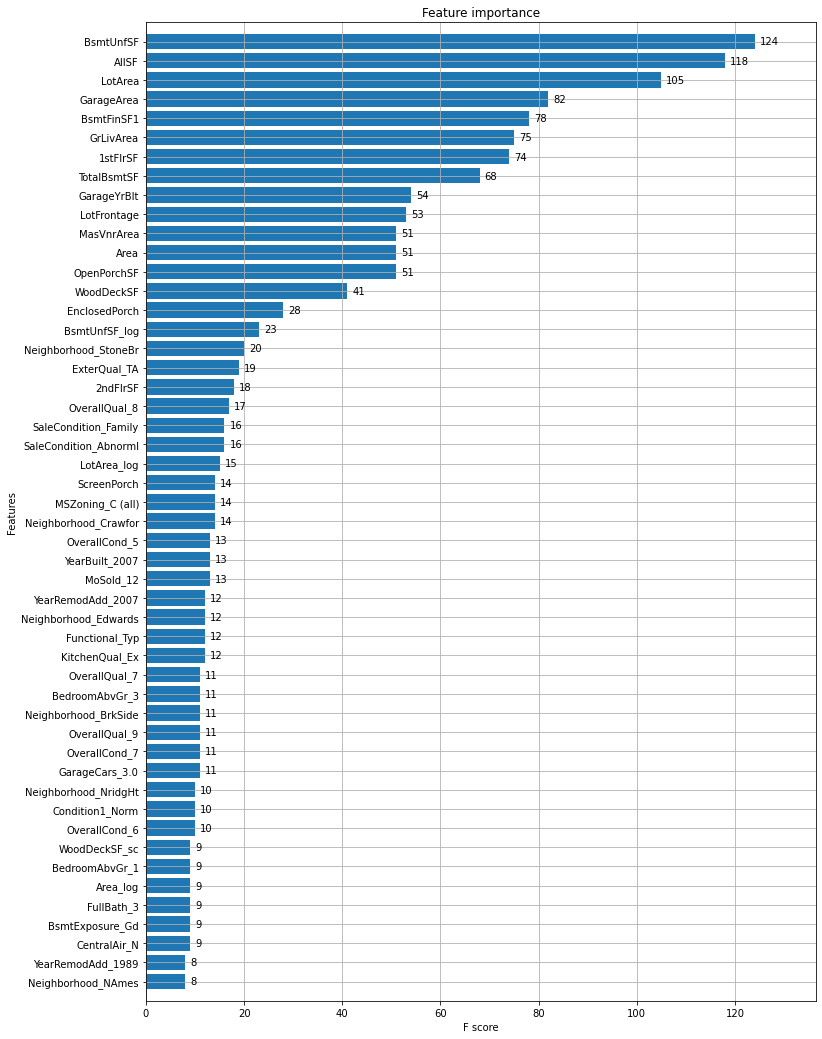

In [ ]:
import matplotlib.pyplot as plt
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
plt.show()